Problem plecakowy.
Strategie typu
- Wybierz najdroższe przedmioty
- Wybierz najlżejsze przedmioty

Niekoniecznie osiągną najlepsze rezultaty.

In [170]:
import random
import pandas as pd

In [171]:
items = [(random.randint(1, 100), random.randint(1, 100)) for _ in range(20)]

In [172]:
items = pd.DataFrame(items, columns=['Weight', 'Value'])
items.index.name = 'Items'

In [173]:
items.T

Items,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19
Weight,17,59,87,52,52,47,76,84,27,12,95,36,94,14,79,59,12,19,70,37
Value,70,69,9,5,88,56,60,61,72,94,77,35,58,20,96,30,69,3,55,91


In [174]:
weightLimit = 200
numberOfAgents = 100

Funkcja do generowania genomów

Genom
dla każdego można dać 0/1.
albo bierzemy albo nie.

20% że weźmie.

In [175]:
# class Agent:
#     def __init__(self, genom):
#         self.genom = genom
#         self.score = 0

In [176]:
# genom = [random.randint(0,5) == 0 for _ in range(len(items))]

In [177]:
def createPopulation(numberOfAgents: int):
    return [[random.randint(0, 5) == 0 for _ in range(len(items))] for _ in range(numberOfAgents)]

FitnessFunction 

Dążymy do maxa wszystkich wartości w plecaku.

Limit - zwracamy 0 jeśli przekroczy limit.


In [178]:
def fitnessFunction(genoms: list):
    selectedItems  = items[genoms]
    weightSum = selectedItems['Weight'].sum()
    valueSum = selectedItems['Value'].sum()
    return 0 if weightSum > weightLimit else valueSum

Selection

Wybieramy tylko te które spełniają warunki (nie przekracza wagi)
I z tych wybieramy najlepsze 20%

In [179]:
def selectionSortedValid(population):
    theBestGenoms = []
    for gene in population:
        value = fitnessFunction(gene)
        if value > 0:
            theBestGenoms.append((value, gene))
    return [gene for _, gene in sorted(theBestGenoms, key=lambda x: x[0], reverse=True)]

def selectTheBest(valid, population, percent=0.5):
    limit = int(len(population) * percent)
    return valid[:limit] if len(valid) > limit else population

Crossing

In [180]:
def crossing(genom1, genom2):
    mask = [random.choice([True, False]) for _ in range(len(items))]
    return [genom1[i] if mask[i] else genom2[i] for i in range(len(items))]

Mutation

In [181]:
def mutate(genom):
    newGenom = list(genom)
    idx = random.randint(0, len(items) - 1)
    newGenom[idx] = not bool(newGenom[idx])
    
def mutateRandom(genom: list, probability=0.2):
    return mutate(genom) if random.random < probability else genom

Generate new population
- Ocena
- Wybór najlepszych
- Crossing przy reprodukcji
- Mutacja

In [182]:
def newGeneration(population: list):
    newPopulation = []
    sortedValid = selectionSortedValid(population)
    
    if len(sortedValid) == 0:
        newPopulation = createPopulation(numberOfAgents)
    else:
        best = selectTheBest(sortedValid, population, 0.5)
        for _ in range(numberOfAgents):
            newGenom = crossing(random.choice(best), random.choice(best))
            newPopulation.append(newGenom)
    return newPopulation

In [186]:
population = createPopulation(100)

for i in range(600):
    population = newGeneration(population)
    
result = pd.concat([pd.DataFrame(population).mean() * 100, items], axis=1)
result.columns = ['Average'] + list(items.columns)
result.index.name = items.index.name
result.T

Items,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19
Average,0.0,100.0,0.0,0.0,100.0,0.0,0.0,0.0,100.0,100.0,0.0,0.0,0.0,0.0,0.0,0.0,100.0,0.0,0.0,100.0
Weight,17.0,59.0,87.0,52.0,52.0,47.0,76.0,84.0,27.0,12.0,95.0,36.0,94.0,14.0,79.0,59.0,12.0,19.0,70.0,37.0
Value,70.0,69.0,9.0,5.0,88.0,56.0,60.0,61.0,72.0,94.0,77.0,35.0,58.0,20.0,96.0,30.0,69.0,3.0,55.0,91.0


<Axes: xlabel='Items'>

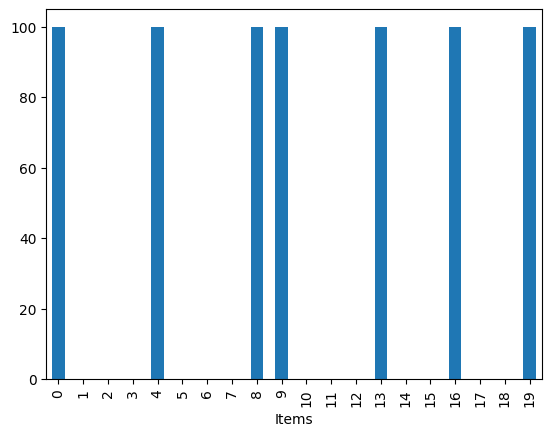

In [184]:
import matplotlib.pyplot as plt
result["Average"].plot.bar()

Waga = 199 
Wartość = 483